In [189]:
##Importing all required libraries for entire project
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols


## PART-I (QUESTION BASED)

#### 1. Question:
##### A. Find the joint probability of the people who planned to purchase and actually placed an order.
##### B. Find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase.

In [4]:
# 1. joint probability of the people who planned to purchase and actually placed an order.
Total = 2000
Planned_purchased = 400
P = Planned_purchased/Total
print('Answer 1A:',P)

#2.joint probability of the people who planned to purchase and actually placed an order,given that people planned to purchase.
Planned = 500
Planned_purchased = 400
P = Planned_purchased/Planned
print('Answer 1B:', P)

Answer 1A: 0.2
Answer 1B: 0.8


#### 2. Question:

###### A. Probability that none of the items are defective?
######  B. Probability that exactly one of the items is defective?
######  C. Probability that two or fewer of the items are defective?
######  D. Probability that three or more of the items are defective ?

In [15]:
#2. p and n values are given, so it follows Binomial distribution
p=0.05
n=10
k=np.arange(0,11)
binomial = stats.binom.pmf(k,n,p)
binomial

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789063e-08,
       1.58642578e-09, 1.85546875e-11, 9.76562500e-14])

In [14]:
#2.A: Probability that none of the items are defective?
print("Answer 2A:", (binomial[0]).round(decimals=4))

#2.B: Probability that exactly one of the items is defective?
print("Answer 2B:", (binomial[1]).round(decimals=4))

#2.C: Probability that two or fewer of the items are defective?
#That means p(0)+p(1)+p(2)
print("Answer 2C:", (binomial[0]+binomial[1]+binomial[2]).round(decimals=4))

#2.D: Probability that three or more of the items are defective ?
#That means 1-(P(0)+p(1)+p(2))
print("Answer 2D:", (1-(binomial[0]+binomial[1]+binomial[2])).round(decimals=4))

Answer 2A: 0.5987
Answer 2B: 0.3151
Answer 2C: 0.9885
Answer 2D: 0.0115


#### 3. Question:

##### A. Probability that in a given week he will sell some cars.
##### B. Probability that in a given week he will sell 2 or more but less than 5 cars.
##### C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold perweek.

In [16]:
#3. We don't the p values or sample size. Only rate is given. So this follows Poisson Distribution
rate = 3
n = np.arange(0,5) #From the asked questions, we need just upto 4.
poisson = stats.poisson.pmf(n,rate)
print(poisson)

[0.04978707 0.14936121 0.22404181 0.22404181 0.16803136]


Answer 3A: 0.9502
Answer 3B: 0.6161


Answer 3C:


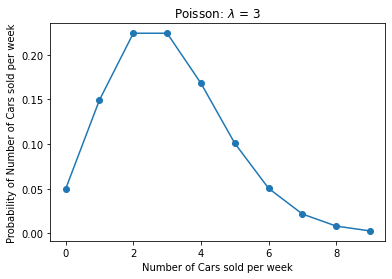

In [23]:
#3.A: Probability that in a given week he will sell some cars.
#That means it shouldn't be 0 cars.
print("Answer 3A:", (1-poisson[0]).round(decimals=4))

#3.B: Probability that in a given week he will sell 2 or more but less than 5 cars.
#P(2)+P(3)+P(4)
print("Answer 3B:", (poisson[2]+poisson[3]+poisson[4]).round(decimals=4))

#3.C:
#For better looking graph lets take till 10 cars per week
n = np.arange(0,10) #From the asked questions, we need just upto 4.
poisson = stats.poisson.pmf(n,rate)

print("\n\nAnswer 3C:")
plt.plot(n,poisson,'o-')
plt.title('Poisson: $\lambda$ = %i ' % rate)
plt.xlabel('Number of Cars sold per week')
plt.ylabel('Probability of Number of Cars sold per week')
plt.show()

#### 4. Question:

##### A. What is the probability that all three orders will be recognised correctly?
##### B. What is the probability that none of the three orders will be recognised correctly?
##### C. What is the probability that at least two of the three orders will be recognised correctly?

In [21]:
#4. Here again p & n values are given, so Binomial distribution. 
p=0.868
n=3
k=np.arange(0,4)
binomial = stats.binom.pmf(k,n,p)
binomial

array([0.00229997, 0.0453721 , 0.2983559 , 0.65397203])

In [24]:
#4.A: What is the probability that all three orders will be recognised correctly?
print("Answer 4A:", (binomial[3]).round(decimals=4))

#4.B: What is the probability that none of the three orders will be recognised correctly?
print("Answer 4B:", (binomial[0]).round(decimals=4))

#4.C: What is the probability that at least two of the three orders will be recognised correctly?
#That means P(2)+P(3)
print("Answer 4C:", (binomial[2]+binomial[3]).round(decimals=4))

Answer 4A: 0.654
Answer 4B: 0.0023
Answer 4C: 0.9523


#### 5. Question:

##### A. What is the percentage of students who score more than 80.
##### B. What is the percentage of students who score less than 50.
##### C. What should be the distinction mark if the highest 10% of students are to be awarded distinction?

In [25]:
#5. Mean & Standard deviation is given, so as stated in question itself, it is Normal distribution. 
mean=60
stddev=12
stats.norm.cdf(300,mean,stddev)

1.0

In [26]:
#5.A: What is the percentage of students who score more than 80.
p=1-stats.norm.cdf(80,mean,stddev)
print("Answer 5A: %.2f%%" % (p*100))

#5.B: What is the percentage of students who score less than 50.
p=stats.norm.cdf(50,mean,stddev)
print("Answer 5B: %.2f%%" % (p*100))

#5.C: What should be the distinction mark if the highest 10% of students are to be awarded distinction?
#Z-Value for 90% above is 1.282
z = 1.282
#Formula: x-mean/stddev=z
x = (z*stddev)+mean
print("Answer 5C: %.2f"% x)
#For testing, we can find % value for x value
p=stats.norm.cdf(x,mean,stddev)
print("Cross checking : Percentage of 5C answer value:  %.2f%%" % (p*100))

Answer 5A: 4.78%
Answer 5B: 20.23%
Answer 5C: 75.38
Cross checking : Percentage of 5C answer value:  90.01%


#### 5. Question:

##### Explain 1 real life industry scenario [other than the ones mentioned above] where you can use the concepts learnt in this module of Applied statistics to get a data driven business solution.

Lets say there is one MP (Member of Parliament) and He/She is responsible for taking the Govt schemes into pubic. Its been 4 years & next election will be in less than a year. So the political party, asked a reserch team to do suvery.

Research team has collected the feedback on scale 1-10 for different aspects such as reachability,corruption, baised, basic infra, health, development,..etc. (some categorical data as will they vote next time? , did they vote last time?)

So we will be having a sample data, consisting of different age groups, genders,rurals, towns..etc.

1. Using the Statistics, we can summrize the data & visualize with proper charts.
2. We can infer the feedback to know what kind of age group are staisfied/unhappy with MP?
3. Probability of them being elected next time?
4. The satisfaction level between Rural areas vs Towns?
5. Is there any gender gap between prople, getting benifited from Govt?
...likewise. 

<style>
.text_cell_render {
font-family: Times New Roman, serif;
}
</style>

## PART-II (PROJECT BASED)

#### 1. Read the data set, clean the data and prepare a final dataset to be used for analysis.

In [29]:
Part2_Main = pd.read_csv("DS - Part2 - Basketball.csv")
Part2_Main.head(5)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [33]:
#Copying the original dataset
Part2_df = Part2_Main.copy()
#printing the shapes of both original, copied df
Part2_Main.shape, Part2_df.shape

((61, 13), (61, 13))

In [34]:
#Lets check the df columns
Part2_df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [36]:
#Dataypes of all attributes
Part2_df.dtypes

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [37]:
#Lets check the types of attributes
Part2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


##### As we can see, all of the data is non-null.
#### So see if the supposed to be numeric attributes has anything other than digits/letters.

In [77]:
import string
alphabet = string.ascii_letters+string.digits
for i in Part2_df.iloc[:,2:11].columns:
    print(i),print(Part2_df[i].str.strip(alphabet).any())

Score
-
PlayedGames
-
WonGames
-
DrawnGames
-
LostGames
-
BasketScored
-
BasketGiven
-
TournamentChampion
-
Runner-up
-


#### As we can see all these columns has special character '-' & lets replace it with 0.

In [90]:
Part2_df = Part2_df.replace('-',0)
#Cross-verify is any columns has null values
Part2_df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

##### Convert all those columns, except Team Name, TeamLaunch Year to INT

In [93]:
temp = ['Team','TeamLaunch']
for i in Part2_df.columns:
    if i not in temp:
        Part2_df[i]= Part2_df[i].astype('int64')
Part2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(11), object(2)
memory usage: 6.3+ KB


##### Since TeamLaunch has uncertain format to get the Year, lets just read first 4 digits to consider it as Year of launched. 

In [96]:
Part2_df["TeamLaunch"]=Part2_df["TeamLaunch"].astype(str).str[:4]
Part2_df["TeamLaunch"] = pd.to_numeric(Part2_df["TeamLaunch"])
Part2_df["TeamLaunch"].head()

0    1929
1    1929
2    1929
3    1931
4    1929
Name: TeamLaunch, dtype: int64

In [128]:
#Droping the last row as no proper data given
Part2_df.drop(Part2_df.tail(1).index,inplace=True)
Part2_df.shape

(60, 19)

### Here we are good to go for analysis the data now.

#### Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get a data driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data and statistics expert you have to develop a detailed performance report using this data.

In [129]:
#Five number summary
Part2_df.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Win_Percentage,Lost_Percentage,Draw_Percentage,BasketScored_PerGame,BasketGiven_PerGame,Champion_PerTournament
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,1957.950000,7.050000,31.364667,44.992167,23.617167,1.263333,1.632833,0.017167
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,26.646732,5.315232,7.831421,8.401111,4.459405,0.307944,0.383313,0.063782
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1929.000000,1.000000,16.670000,20.380000,11.110000,0.780000,1.130000,0.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,1934.750000,3.000000,27.610000,41.147500,22.330000,1.067500,1.407500,0.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,1950.500000,6.000000,30.490000,45.725000,24.370000,1.205000,1.515000,0.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,1977.250000,10.000000,33.542500,48.542500,26.212500,1.355000,1.675000,0.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.00000,25.000000,2016.000000,20.000000,59.630000,70.000000,38.600000,2.150000,2.830000,0.380000


#### There is huge difference between Min, Avg, Max values
#### Most of them are right skewed
#### Most of them has outliers


#### Lets derive few data driven facts from the given df

In [130]:
#Oldest Teams as per TeamLaunch year
Part2_df[Part2_df['TeamLaunch'] == Part2_df['TeamLaunch'].min()][['Team','TeamLaunch']]

,Team,TeamLaunch
0,Team 1,1929
1,Team 2,1929
2,Team 3,1929
4,Team 5,1929
6,Team 7,1929
7,Team 8,1929
13,Team 14,1929
44,Team 45,1929
51,Team 52,1929
53,Team 54,1929


In [131]:
#Latest Teams as per TeamLaunch year
Part2_df[Part2_df['TeamLaunch'] == Part2_df['TeamLaunch'].max()][['Team','TeamLaunch']]

,Team,TeamLaunch
55,Team 56,2016


In [132]:
#Most successful team interms of more wins
Part2_df['Win_Percentage']=(Part2_df['WonGames']/Part2_df['PlayedGames'])*100
Part2_df['Win_Percentage'] = Part2_df['Win_Percentage'].round(decimals=2)
Part2_df[Part2_df['Win_Percentage'] == Part2_df['Win_Percentage'].max()][['Team','Win_Percentage']]

,Team,Win_Percentage
0,Team 1,59.63


C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Team', ylabel='Win_Percentage'>

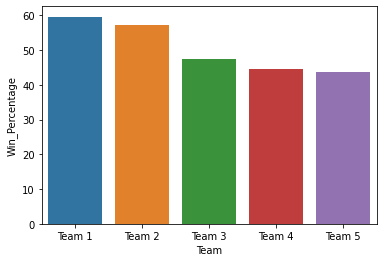

In [133]:
#TOP-5 teams in terms of winning percentage
temp=Part2_df.sort_values('Win_Percentage',ascending=False).head(5)
sns.barplot(temp['Team'],temp['Win_Percentage'])

#### Team1, Team2, Team3, Team4 , Team5 are the top-5 teams in terms of Wins %

In [134]:
#Most successful team interms of less losts
Part2_df['Lost_Percentage']=(Part2_df['LostGames']/Part2_df['PlayedGames'])*100
Part2_df['Lost_Percentage'] = Part2_df['Lost_Percentage'].round(decimals=2)
Part2_df[Part2_df['Lost_Percentage'] == Part2_df['Lost_Percentage'].min()][['Team','Lost_Percentage']]

,Team,Lost_Percentage
0,Team 1,20.38


C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Team', ylabel='Lost_Percentage'>

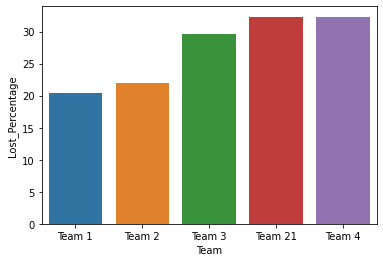

In [135]:
#TOP-5 teams in terms of LESS losing percentage
temp=Part2_df.sort_values('Lost_Percentage').head(5)
sns.barplot(temp['Team'],temp['Lost_Percentage'])

#### Team1, Team2, Team3, Team21, Team4 are the most successful teams in terms less  losing%

## Overall, we can say Team1, Team2, Team3 are top most successful teams interms of max win%, min lose%

In [136]:
#Most successful team in terms of more drawn games per played
Part2_df['Draw_Percentage']=(Part2_df['DrawnGames']/Part2_df['PlayedGames'])*100
Part2_df['Draw_Percentage'] = Part2_df['Draw_Percentage'].round(decimals=2)
Part2_df.sort_values('Draw_Percentage',ascending=False).head(5)[['Team','Draw_Percentage']]

,Team,Draw_Percentage
45,Team 46,38.60
48,Team 49,30.00
55,Team 56,28.95
47,Team 48,28.75
32,Team 33,28.35


In [137]:
#Top-5 teams in terms of more baskets scored/playedgames
Part2_df['BasketScored_PerGame']=(Part2_df['BasketScored']/Part2_df['PlayedGames'])
Part2_df['BasketScored_PerGame'] = Part2_df['BasketScored_PerGame'].round(decimals=2)
Part2_df.sort_values('BasketScored_PerGame',ascending=False).head(5)[['Team','BasketScored_PerGame']]

,Team,BasketScored_PerGame
0,Team 1,2.15
1,Team 2,2.14
51,Team 52,2.12
53,Team 54,1.80
44,Team 45,1.75


In [138]:
#Top-5 teams in terms of less baskets given/playedgames
Part2_df['BasketGiven_PerGame']=(Part2_df['BasketGiven']/Part2_df['PlayedGames'])
Part2_df['BasketGiven_PerGame'] = Part2_df['BasketGiven_PerGame'].round(decimals=2)
Part2_df.sort_values('BasketGiven_PerGame',ascending=True).head(5)[['Team','BasketGiven_PerGame']]


,Team,BasketGiven_PerGame
1,Team 2,1.13
0,Team 1,1.14
45,Team 46,1.22
20,Team 21,1.22
41,Team 42,1.23


#### Overall Team1, Team2 are successful teams interms of more BasketScorePerGame, less BasketGivenPerGame
#### Also Team46 has most drawn%, BasketGivenPerGame is also good enough. 

In [149]:
#Top-5 teams in terms of TournamentChampion/Tournament(total)
Part2_df['Champion_PerTournament']=(Part2_df['TournamentChampion']/Part2_df['Tournament'])
Part2_df['Champion_PerTournament'] = Part2_df['Champion_PerTournament'].round(decimals=2)
Part2_df.sort_values('Champion_PerTournament',ascending=False).head(5)[['Team','Champion_PerTournament']]

,Team,Champion_PerTournament
0,Team 1,0.38
1,Team 2,0.29
2,Team 3,0.12
4,Team 5,0.09
3,Team 4,0.07


#### Team1, Team2 has almost 38%, 29% sucessful Tournament winning probability, which is way better than any other team.

In [140]:
#Variance 
Part2_df.var()

Tournament                7.227828e+02
Score                     1.295825e+06
PlayedGames               7.699455e+05
WonGames                  1.668570e+05
DrawnGames                4.079815e+04
LostGames                 8.673534e+04
BasketScored              2.286337e+06
BasketGiven               1.354772e+06
TournamentChampion        3.042119e+01
Runner-up                 2.092768e+01
TeamLaunch                7.100483e+02
HighestPositionHeld       2.825169e+01
Win_Percentage            6.133115e+01
Lost_Percentage           7.057866e+01
Draw_Percentage           1.988630e+01
BasketScored_PerGame      9.482938e-02
BasketGiven_PerGame       1.469291e-01
Champion_PerTournament    4.068107e-03
dtype: float64

In [141]:
#Standard deviation
Part2_df.std()

Tournament                  26.884620
Score                     1138.342899
PlayedGames                877.465393
WonGames                   408.481395
DrawnGames                 201.985508
LostGames                  294.508639
BasketScored              1512.063948
BasketGiven               1163.946914
TournamentChampion           5.515540
Runner-up                    4.574679
TeamLaunch                  26.646732
HighestPositionHeld          5.315232
Win_Percentage               7.831421
Lost_Percentage              8.401111
Draw_Percentage              4.459405
BasketScored_PerGame         0.307944
BasketGiven_PerGame          0.383313
Champion_PerTournament       0.063782
dtype: float64

In [142]:
Part2_df.cov()
#Seems most of attributes having +ve cov

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Win_Percentage,Lost_Percentage,Draw_Percentage,BasketScored_PerGame,BasketGiven_PerGame,Champion_PerTournament
Tournament,722.782768,3.003033e+04,2.355925e+04,10671.614124,5372.170904,7516.715537,3.962956e+04,3.090991e+04,87.383898,79.441243,-429.234746,-101.172034,172.550893,-171.944912,-0.402794,4.414972,-4.884833,1.022630
Score,30030.333051,1.295825e+06,9.785666e+05,463704.696610,220292.385593,294612.626271,1.715454e+06,1.250509e+06,4489.268644,3982.835593,-16335.672034,-4049.124576,7821.650576,-7742.184890,-72.252771,206.352712,-214.839263,52.387398
PlayedGames,23559.249153,9.785666e+05,7.699455e+05,346774.216949,176166.940678,247031.154237,1.286941e+06,1.011131e+06,2783.174576,2541.345763,-13590.384746,-3316.361017,5587.922576,-5660.759881,77.295542,138.140508,-166.047237,32.596220
WonGames,10671.614124,4.637047e+05,3.467742e+05,166857.049718,77508.658192,102428.853672,6.172252e+05,4.401460e+05,1696.289831,1490.917514,-5882.320339,-1406.527119,2828.757299,-2755.054480,-70.363124,76.805141,-74.215181,19.763825
DrawnGames,5372.170904,2.202924e+05,1.761669e+05,77508.658192,40798.145480,57867.608757,2.877725e+05,2.333322e+05,560.792373,523.014124,-3068.826271,-773.258475,1224.985876,-1285.323912,61.558715,28.655650,-39.372952,6.596511
LostGames,7516.715537,2.946126e+05,2.470312e+05,102428.853672,57867.608757,86735.338701,3.820110e+05,3.376645e+05,526.338136,527.657062,-4642.466949,-1136.736441,1534.581887,-1620.684511,86.255404,32.695537,-52.465404,6.238794
BasketScored,39629.558475,1.715454e+06,1.286941e+06,617225.191525,287772.461864,382010.997458,2.286337e+06,1.638664e+06,6203.568644,5471.794915,-22166.405932,-5213.356780,10410.075119,-10099.470432,-299.415941,286.768983,-268.057619,72.259653
BasketGiven,30909.909040,1.250509e+06,1.011131e+06,440145.958192,233332.166667,337664.535028,1.638664e+06,1.354772e+06,3027.689831,2840.439548,-18885.327119,-4499.689831,6902.756011,-7011.902887,111.400842,167.014294,-206.436605,35.582876
TournamentChampion,87.383898,4.489269e+03,2.783175e+03,1696.289831,560.792373,526.338136,6.203569e+03,3.027690e+03,30.421186,24.513559,-42.146610,-8.921186,33.058034,-29.592178,-3.425822,1.052542,-0.642314,0.351636
Runner-up,79.441243,3.982836e+03,2.541346e+03,1490.917514,523.014124,527.657062,5.471795e+03,2.840440e+03,24.513559,20.927684,-38.672881,-8.733898,28.704893,-26.025362,-2.640277,0.902938,-0.581079,0.283960


In [143]:
#Correlation among attributes
Part2_df.corr()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Win_Percentage,Lost_Percentage,Draw_Percentage,BasketScored_PerGame,BasketGiven_PerGame,Champion_PerTournament
Tournament,1.000000,0.981258,0.998683,0.971749,0.989295,0.949350,0.974867,0.987781,0.589304,0.645924,-0.599166,-0.708002,0.819545,-0.761288,-0.003360,0.533277,-0.474015,0.596374
Score,0.981258,1.000000,0.979687,0.997232,0.958090,0.878780,0.996634,0.943801,0.715014,0.764819,-0.538542,-0.669215,0.877374,-0.809569,-0.014233,0.588661,-0.492364,0.721535
PlayedGames,0.998683,0.979687,1.000000,0.967486,0.993972,0.955925,0.969970,0.990020,0.575072,0.633101,-0.581243,-0.711065,0.813167,-0.767906,0.019754,0.511234,-0.493682,0.582426
WonGames,0.971749,0.997232,0.967486,1.000000,0.939416,0.851436,0.999312,0.925745,0.752904,0.797849,-0.540421,-0.647819,0.884266,-0.802826,-0.038627,0.610586,-0.473987,0.758582
DrawnGames,0.989295,0.958090,0.993972,0.939416,1.000000,0.972786,0.942234,0.992479,0.503378,0.566021,-0.570175,-0.720248,0.774409,-0.757453,0.068343,0.460700,-0.508538,0.512033
LostGames,0.949350,0.878780,0.955925,0.851436,0.972786,1.000000,0.857843,0.985041,0.324025,0.391645,-0.591571,-0.726172,0.665352,-0.655034,0.065677,0.360511,-0.464752,0.332129
BasketScored,0.974867,0.996634,0.969970,0.999312,0.942234,0.857843,1.000000,0.931079,0.743847,0.791041,-0.550150,-0.648672,0.879110,-0.795045,-0.044405,0.615872,-0.462492,0.749255
BasketGiven,0.987781,0.943801,0.990020,0.925745,0.992479,0.985041,0.931079,1.000000,0.471618,0.533448,-0.608902,-0.727323,0.757267,-0.717077,0.021462,0.465960,-0.462700,0.479305
TournamentChampion,0.589304,0.715014,0.575072,0.752904,0.503378,0.324025,0.743847,0.471618,1.000000,0.971533,-0.286768,-0.304307,0.765329,-0.638634,-0.139284,0.619698,-0.303812,0.999559
Runner-up,0.645924,0.764819,0.633101,0.797849,0.566021,0.391645,0.791041,0.533448,0.971533,1.000000,-0.317250,-0.359191,0.801226,-0.677173,-0.129423,0.640952,-0.331376,0.973198


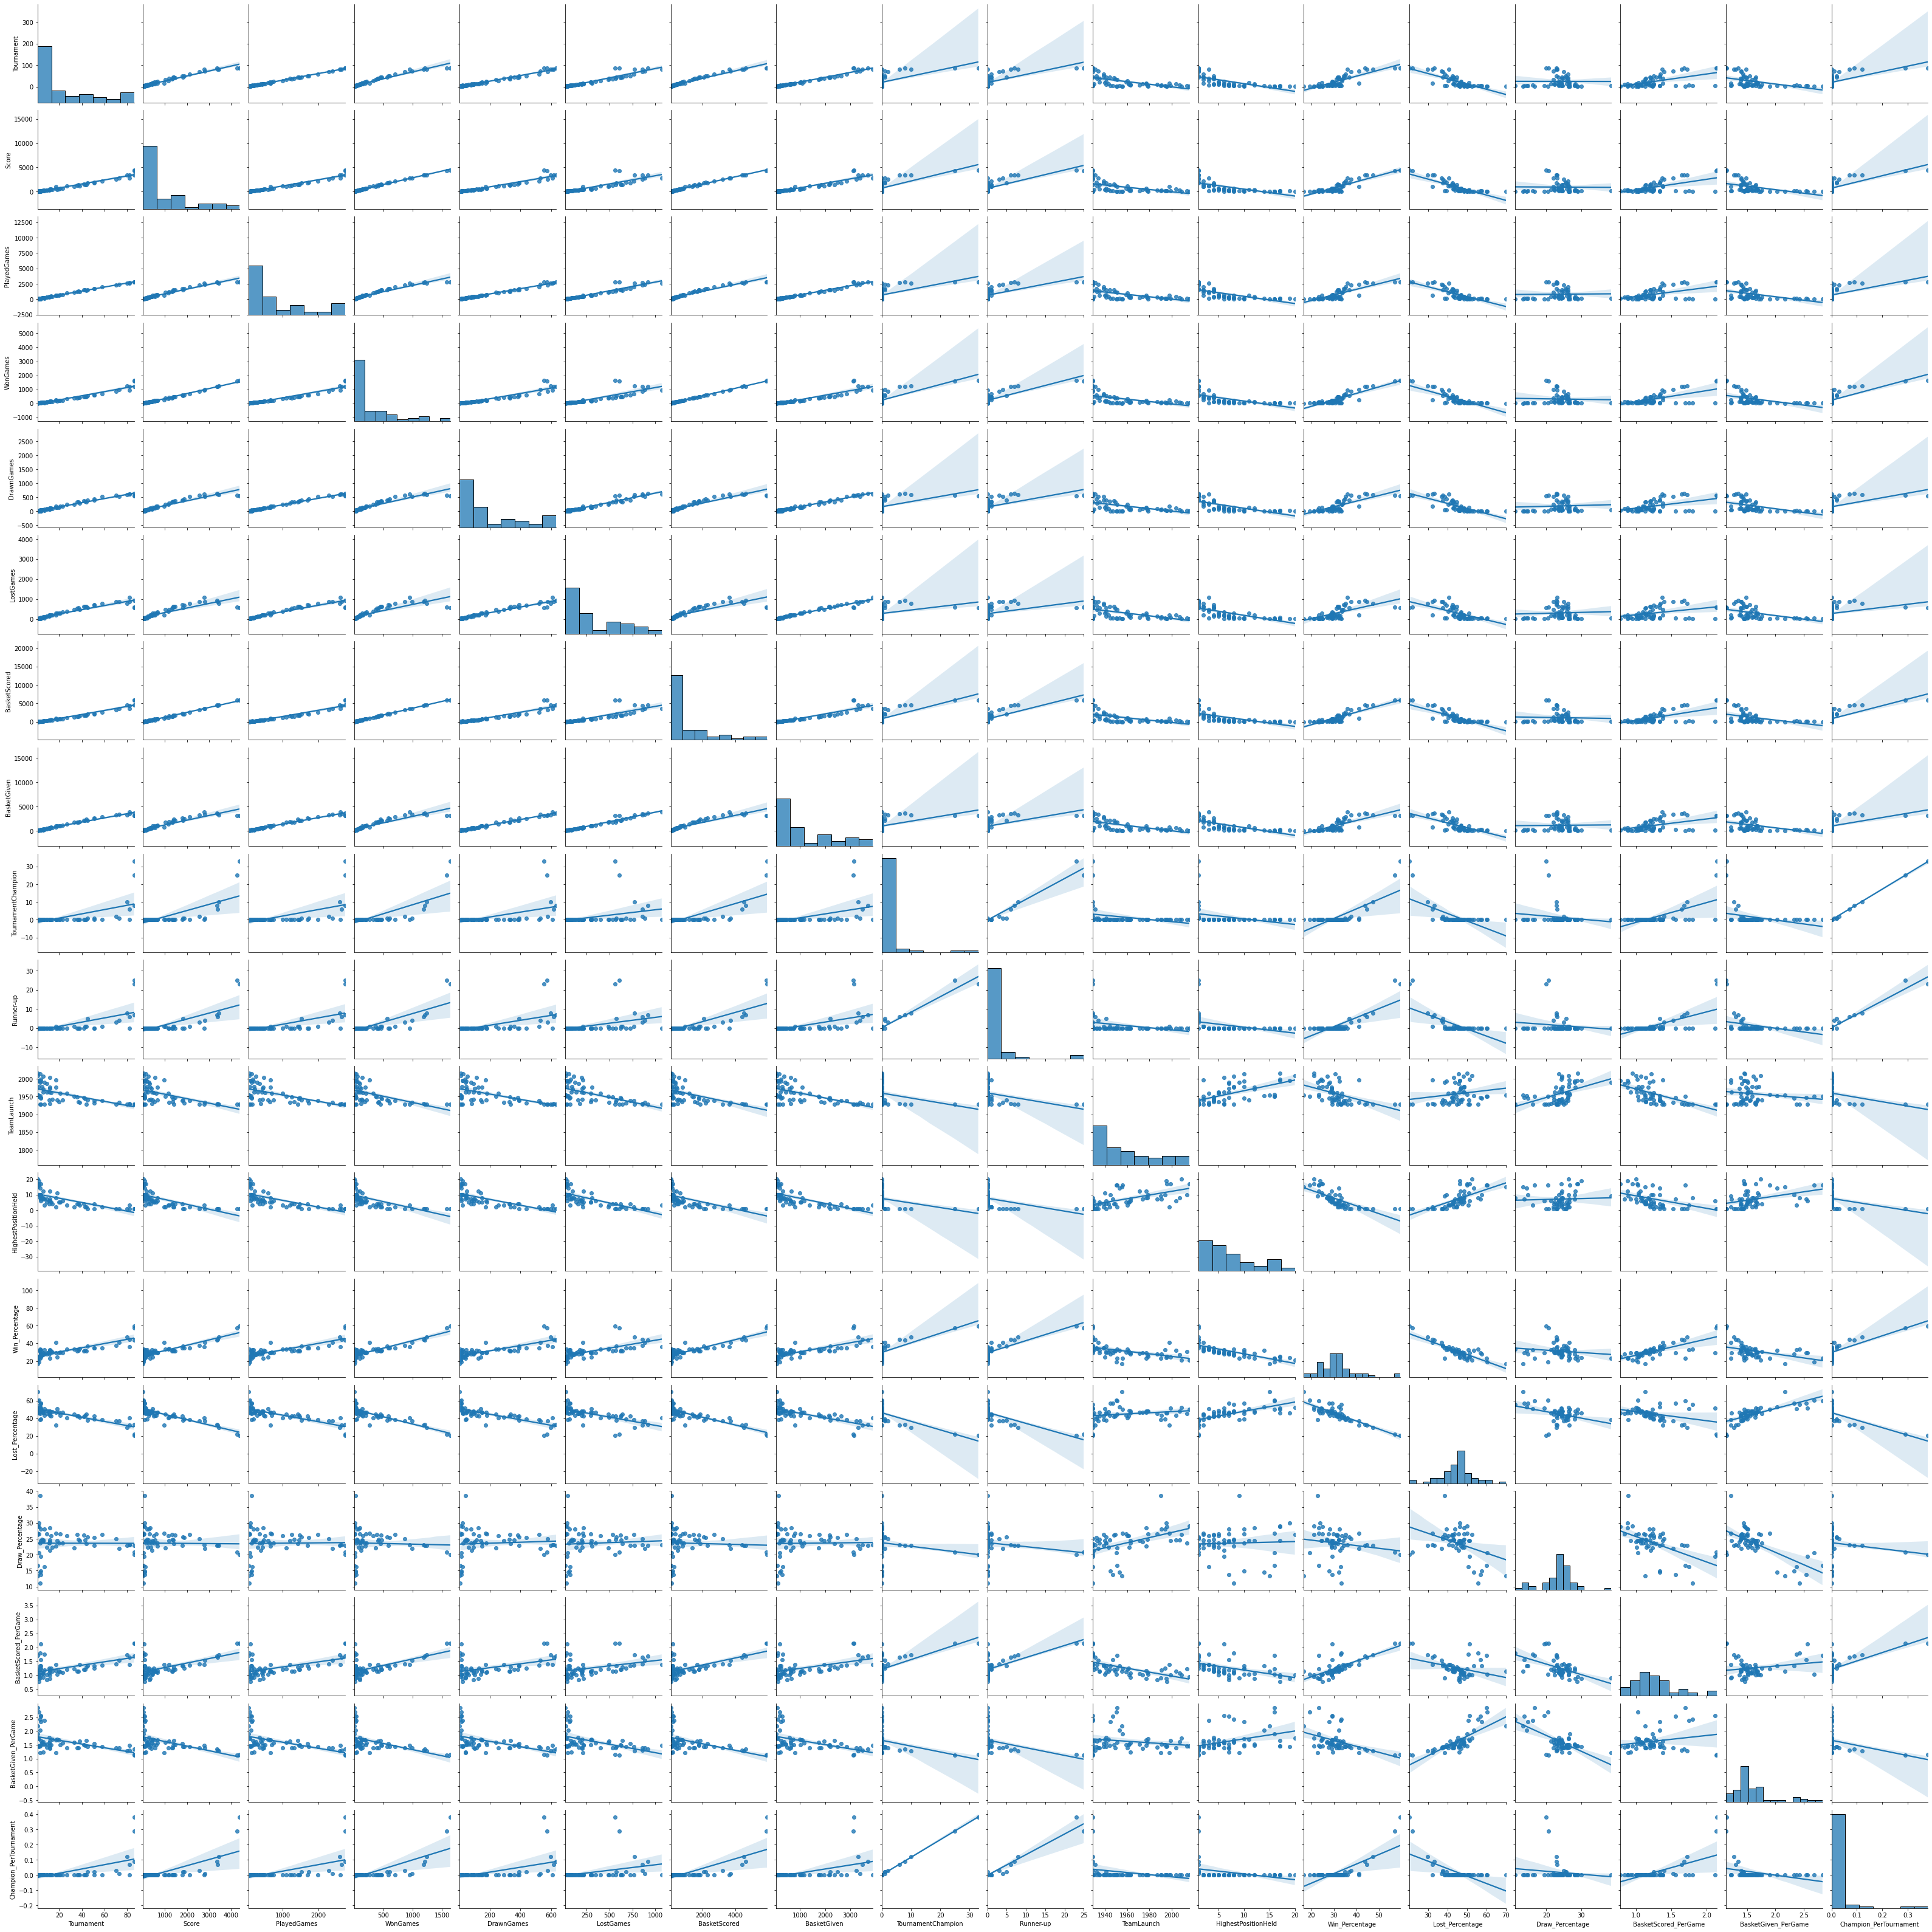

In [144]:
sns.pairplot(Part2_df,kind='reg')

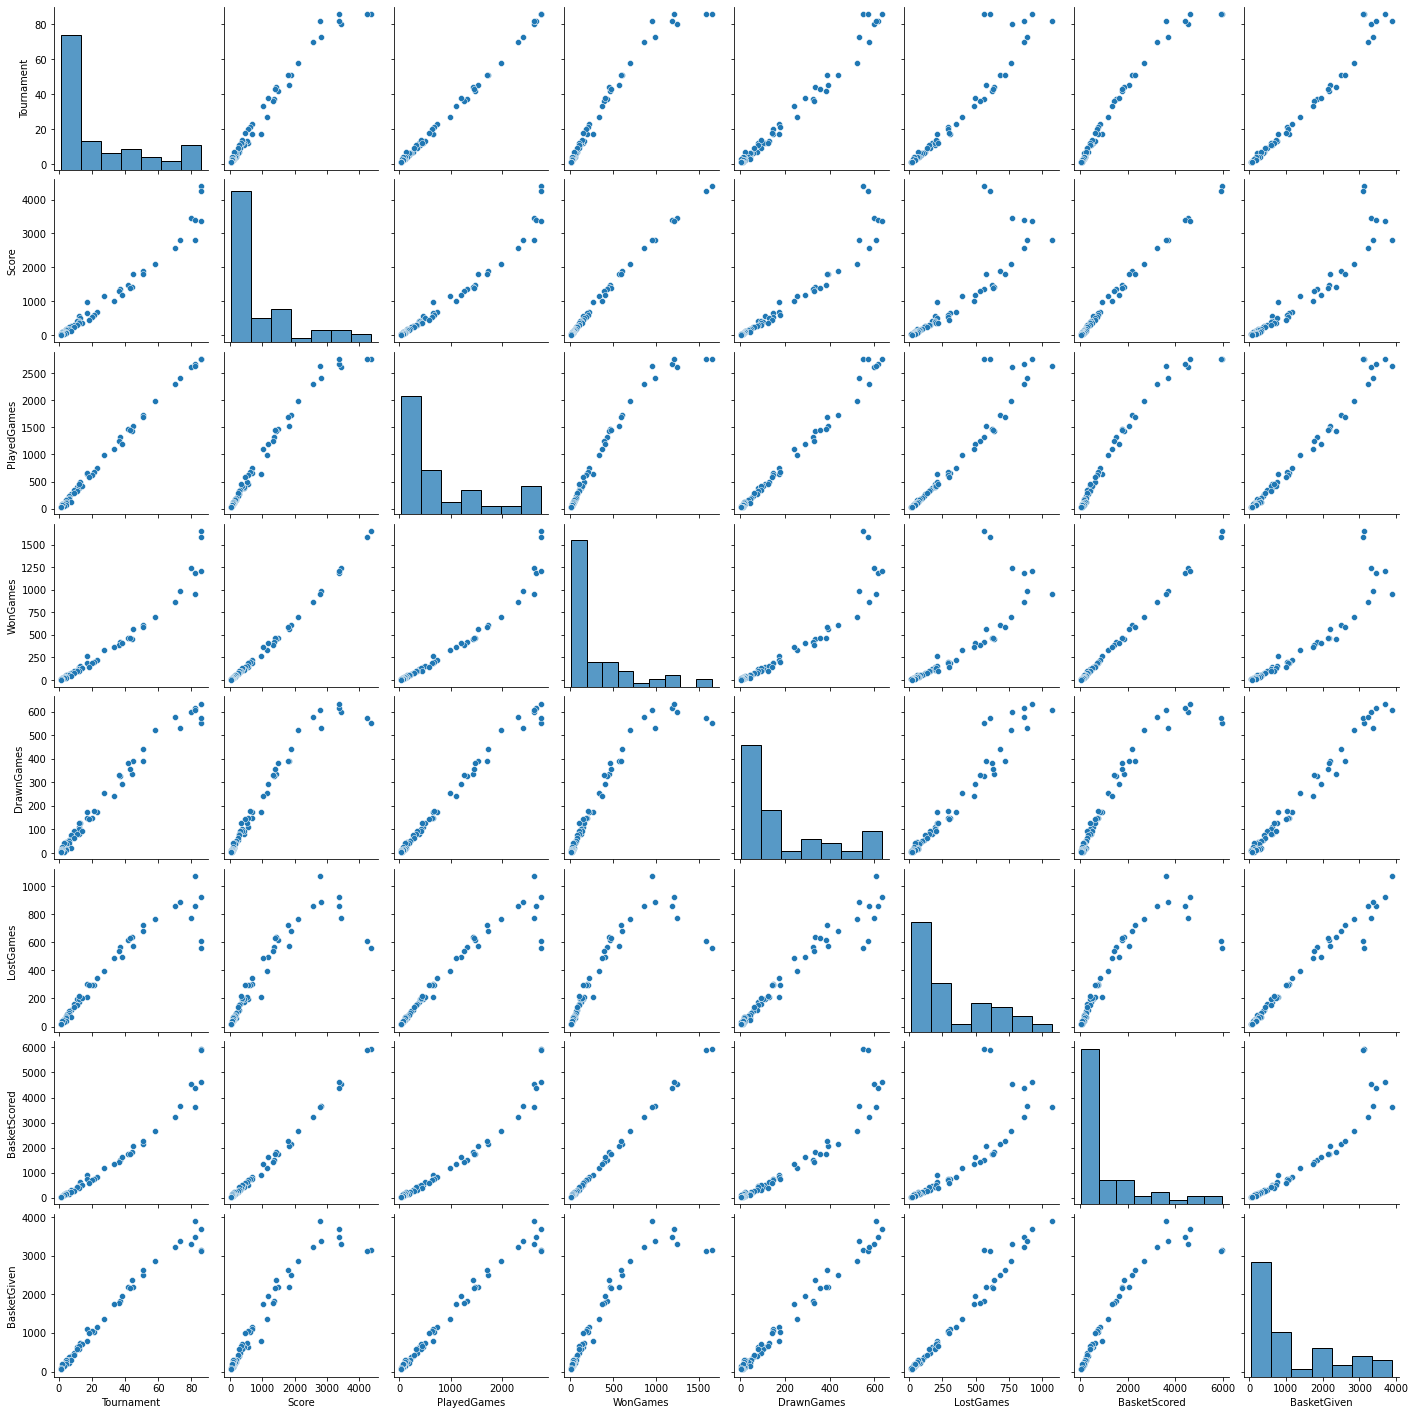

In [145]:
sns.pairplot(Part2_df, vars=Part2_df.columns[1:9])

#### As we can see in above, most of the attributes has liner relationships.

<AxesSubplot:>

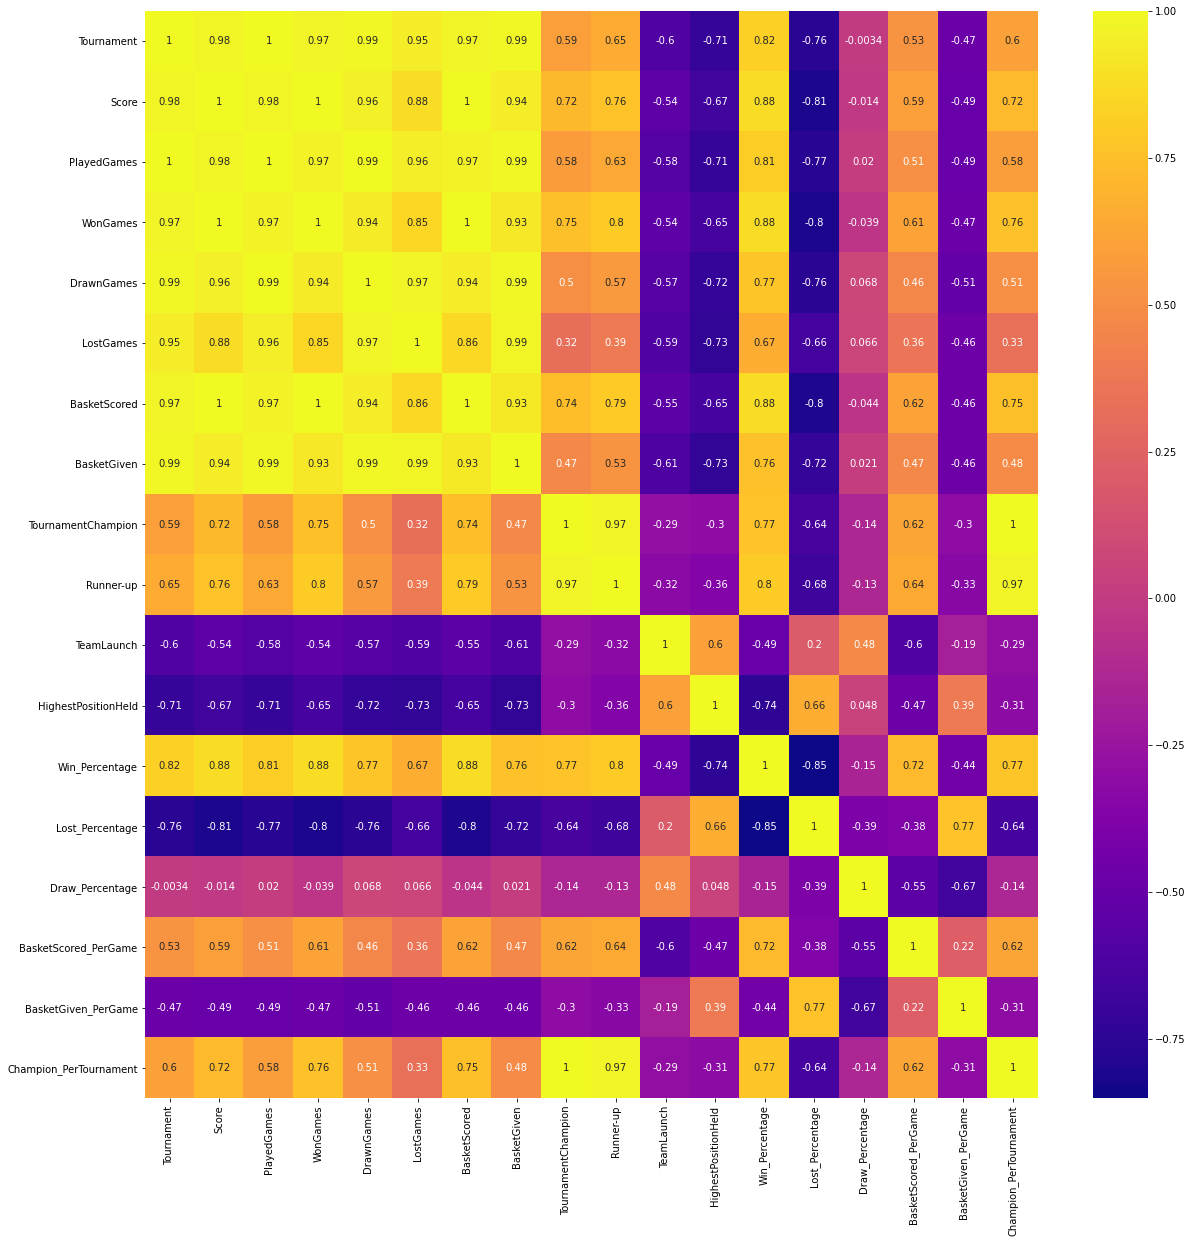

In [146]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(Part2_df.corr(),ax=ax,annot=True,cmap="plasma")

#We can see proper blue among the first 10 attributes.

In [147]:
Part2_df.skew()
#Most of them are right/positive skewed distributions

Tournament                1.197176
Score                     1.574104
PlayedGames               1.123454
WonGames                  1.786067
DrawnGames                0.984899
LostGames                 0.880596
BasketScored              1.758058
BasketGiven               0.958164
TournamentChampion        4.734845
Runner-up                 4.321794
TeamLaunch                0.682570
HighestPositionHeld       0.832164
Win_Percentage            1.439962
Lost_Percentage          -0.268815
Draw_Percentage          -0.384321
BasketScored_PerGame      1.238047
BasketGiven_PerGame       1.603181
Champion_PerTournament    4.692406
dtype: float64

#### Most of the attributes are having right skewed distribution & has outliers as we see below boxplot.

<AxesSubplot:>

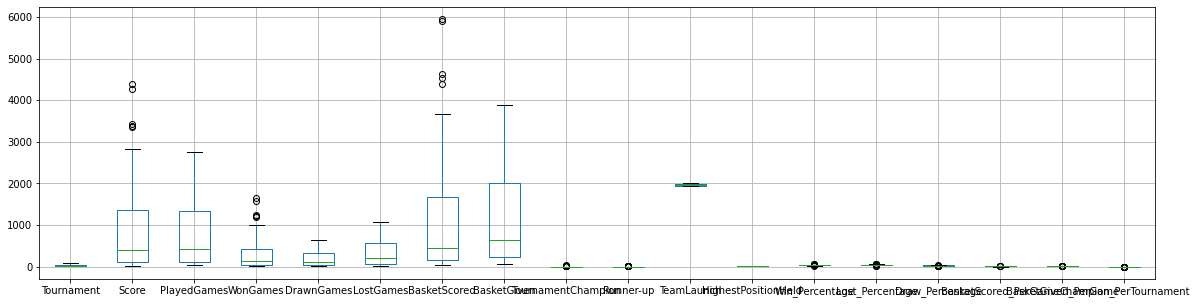

In [148]:
plt.figure(figsize=(20,5))
Part2_df.boxplot()

### 3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future.

1. Quality of the data is moderate because it has special character '-', datatypes of the attributes aren't right.
2. Also we have Team61 with no info is given basically. We can assume either 0 matches/score for them or null values. Either case we had to drop the row, because it will influece the stats if we replace it with 0.
3. This can be processed fatser. 
4. Most of the attribute values are right-skewed, has outliers which influences the outcomes.
5. We only have 61 teams of data (which is fine enough within a state/country)
6. Varience of the data seems to be in same direction among many attributes, which linear. 
7. Data seems to be meaningful enough & has included required information. Size is not large too.
8. Data is of stats of the teams so it can be quickly genarated & doesn't necessarily collected by humans. And has better value. 


## PART-III (PROJECT BASED)

#### 1. Data warehouse: 

##### Read the CSV file.

In [151]:
Part3_original = pd.read_csv("DS - Part3 - CompanyX_EU.csv")
Part3_df = Part3_original.copy()
print(Part3_df.head(5))

print("Shape of the dataframe", Part3_df.shape)
dupes = Part3_df.duplicated()
print("There are",dupes.sum(),"duplicate values exists.")

           Startup             Product Funding             Event  \
0           2600Hz          2600hz.com     NaN   Disrupt SF 2013   
1             3DLT            3dlt.com   $630K  Disrupt NYC 2013   
2      3DPrinterOS     3dprinteros.com     NaN   Disrupt SF 2016   
3       3Dprintler      3dprintler.com     $1M   Disrupt NY 2016   
4  42 Technologies  42technologies.com     NaN  Disrupt NYC 2013   

            Result OperatingState  
0       Contestant      Operating  
1       Contestant         Closed  
2       Contestant      Operating  
3  Audience choice      Operating  
4       Contestant      Operating  
Shape of the dataframe (662, 6)
There are 0 duplicate values exists.


#### 2. Data exploration:
###### • Check the datatypes of each attribute.
###### • Check for null values in the attributes.

In [153]:
#2. Data exploration:
#Check the datatypes of each attribute
Part3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [155]:
#2. Data exploration:
#Check for null values in the attributes
if Part3_df.isnull().values.any() :
    null_count = Part3_df.isnull().sum().sum()
    print("\nYes, there are", null_count ,"null values in the dataset\n")
    print("count of null values in the attributes\n\n",Part3_df.isnull().sum())
    
else :
    print("No there are no null values in the dataset")


Yes, there are 220 null values in the dataset

count of null values in the attributes

 Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64


### 3. Data preprocessing & visualisation:
###### • Drop the null values.
###### • Convert the ‘Funding’ features to a numerical value.
###### • Plot box plot for funds in million.
###### • Get the lower fence from the box plot.
###### • Check number of outliers greater than upper fence.
###### • Drop the values that are greater than upper fence.
###### • Plot the box plot after dropping the values.
###### • Check frequency of the OperatingState features classes.
###### • Plot a distribution plot for Funds in million.
###### • Plot distribution plots for companies still operating and companies that closed

In [156]:
#3. Data preprocessing & visualisation:
#Drop the null values.
print("Before dropping null values: ",Part3_df.shape)
Part3_df.dropna(inplace=True)
print("After dropping null values: ",Part3_df.shape)

Before dropping null values:  (662, 6)
After dropping null values:  (446, 6)


In [157]:
#3. Data preprocessing & visualisation:
#Convert the ‘Funding’ features to a numerical value.
Part3_df['Funding'] = Part3_df['Funding'].replace({'\$': ''},regex=True).astype(str)
Part3_df['Funding'] = Part3_df['Funding'].replace({'K': '*1000', 'M': '*1000000', 'B': '*1000000000'}, regex=True).map(pd.eval).astype(int)
print("Datatype of Funding now is :",(Part3_df['Funding'].dtypes))

Datatype of Funding now is : int32


count     446.000000
mean       17.241489
std        90.483710
min         0.005000
25%         0.745250
50%         2.200000
75%         9.475000
max      1700.000000
Name: FundinginMillions, dtype: float64


Skew value is  15.3265


<AxesSubplot:xlabel='FundinginMillions'>

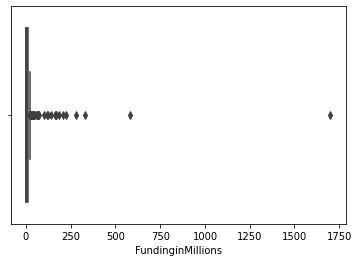

In [161]:
#3. Data preprocessing & visualisation:
# Plot box plot for funds in million.
Part3_df['FundinginMillions']=Part3_df['Funding']/1000000
print(Part3_df['FundinginMillions'].describe())
print("\n\nSkew value is ", (Part3_df['FundinginMillions'].skew()).round(decimals=4))
sns.boxplot(x=Part3_df['FundinginMillions'])

##### It seems the the outliers are way too far from mean & all. Thats why IQR looks very insignificant within box plot.

##### From above,  5-number summary & skew value indicates that its right skewed.

In [162]:
#3. Data preprocessing & visualisation:
#Get the lower fence from the box plot.
Q1 = Part3_df['FundinginMillions'].quantile(0.25)
Q2 = Part3_df['FundinginMillions'].quantile(0.50)
Q3 = Part3_df['FundinginMillions'].quantile(0.75)
IQR = Q3-Q1
Lower_Fence = Q1 - (1.5 * IQR).round(decimals=4)
print("Lower fence :", Lower_Fence)

Lower fence : -12.34935


In [163]:
#3. Data preprocessing & visualisation:
#Check number of outliers greater than upper fence.
Upper_Fence = Q3 + (1.5 * IQR).round(decimals=4)
print("Upper fence :", Upper_Fence)
row_nos = np.where(Part3_df['FundinginMillions'] > Upper_Fence)
row_nos

Upper fence : 22.5696


(array([  3,  16,  21,  27,  33,  67,  71,  82,  84,  85,  87,  88, 102,
        111, 117, 121, 122, 127, 129, 140, 144, 146, 153, 157, 183, 187,
        189, 192, 205, 208, 212, 221, 230, 260, 263, 264, 267, 286, 291,
        294, 311, 318, 365, 371, 375, 389, 395, 400, 403, 409, 418, 432,
        433, 436, 437, 438, 439, 440, 443, 445], dtype=int64),)

#### The above are array of row numbers of  mydata['FundinginMillions'] where the value is beyond Upper Fence.
#### Lets verify by printing those values

In [164]:
j = Part3_df.columns.get_loc('FundinginMillions')

for i in row_nos :
    print(Part3_df.iloc[i,j])

6        29.000000
31       24.000000
40       50.900000
49       40.000000
56      205.000000
108      32.500000
113     182.100000
128      35.400000
130      38.000000
132      37.100000
138      72.000000
139      64.000000
154    1700.000000
166      34.600000
172      35.500000
179      30.100000
180      26.000000
188      66.000000
191      28.300000
209     103.000000
213      25.900000
215      36.500000
225      44.700000
231      24.200000
271     122.400000
276      34.900000
279      67.800000
282     166.100000
302      42.100000
305      69.000000
313      65.099999
325      25.100000
346      31.800000
389      37.000000
393      38.500000
394      25.500000
398      24.000000
427     278.000000
432      24.000000
435      63.000000
460      25.000000
471     160.000000
546      40.000000
555      47.400000
560      24.500000
581      25.000000
593     332.400000
598      35.000000
606     168.800000
615      28.000000
625      30.800000
643      41.800000
644     142.

In [166]:
#3. Data preprocessing & visualisation:
#Drop the values that are greater than upper fence.
Part3_df_exclude_outliers = Part3_df[(Part3_df['FundinginMillions'] < Upper_Fence)]
Part3_df_exclude_outliers.shape,Part3_df.shape

((386, 7), (446, 7))

<AxesSubplot:xlabel='FundinginMillions'>

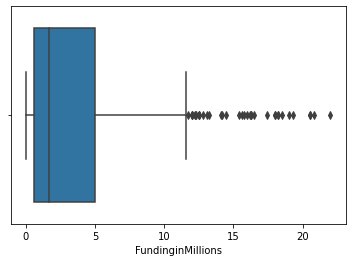

In [168]:
#3. Data preprocessing & visualisation:
#Plot the box plot after dropping the values.
sns.boxplot(x=Part3_df_exclude_outliers['FundinginMillions'])

##### From 1750 as max value, the graph is reduced to around 20 now as the upperfence is 22.5

<AxesSubplot:xlabel='OperatingState', ylabel='count'>

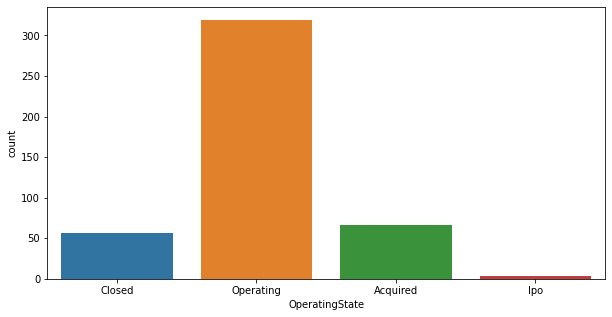

In [169]:
#3. Data preprocessing & visualisation:
#Check frequency of the OperatingState features classes.
plt.figure(figsize = (10,5))
sns.countplot(x = Part3_df['OperatingState'])

(<seaborn.axisgrid.FacetGrid at 0x27a46622940>,
 <seaborn.axisgrid.FacetGrid at 0x27a4672b910>)

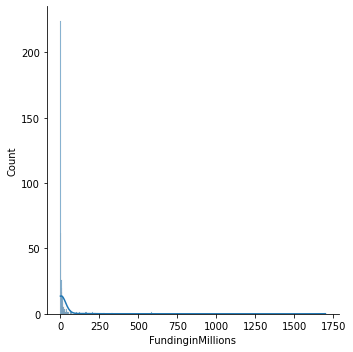

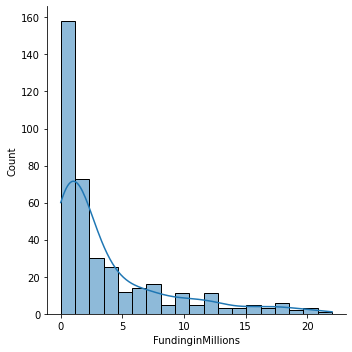

In [171]:
#3. Data preprocessing & visualisation:
#Plot a distribution plot for Funds in million.
sns.displot(data = Part3_df, x = "FundinginMillions",kde=True), sns.displot(data = Part3_df_exclude_outliers, 
                                                                        x = "FundinginMillions",kde=True)

##### The first graph includes all values and the other excludes outliers which are greater than upper fence.

##### Companies with Funds within lessthan 5millions, are more in number

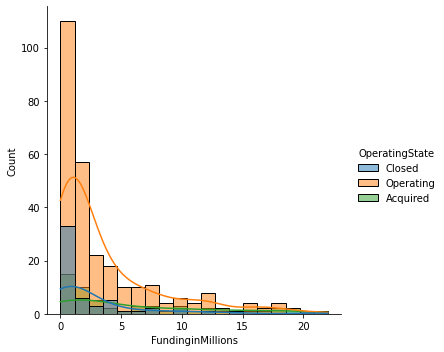

In [172]:
#3. Data preprocessing & visualisation:
#Plot distribution plots for companies still operating and companies that closed.
sns.displot(data = Part3_df_exclude_outliers,x = "FundinginMillions",hue='OperatingState',kde = True)

##### Funds collected by the Operating companies are more than the rest.

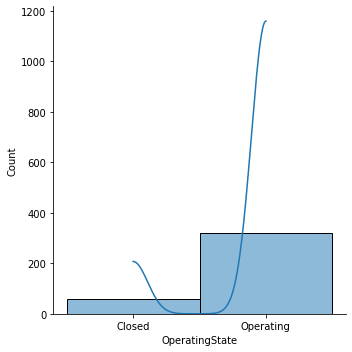

In [174]:
#3. Data preprocessing & visualisation:
#Plot distribution plots for companies still operating and companies that closed.
Part3_df_temp = Part3_df[(Part3_df.OperatingState == 'Closed')| (Part3_df.OperatingState == 'Operating')]
sns.displot(data = Part3_df_temp,x = 'OperatingState',kde=True)

#### The Operating companies are more in count than rest.

### 4. Statistical analysis:
###### • Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? Write the null hypothesis and alternative hypothesis. Test for significance and conclusion
######  • Make a copy of the original data frame.
######  • Check frequency distribution of Result variable.
######  • Calculate percentage of winners that are still operating and percentage of contestants that are still operating
######  • Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: Write the null hypothesis and alternative hypothesis. Test for significance and conclusion
######  • Check distribution of the Event variable.
######  • Select only the Event that has disrupt keyword from 2013 onwards.
######  • Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.
######  • Plot the distribution plot comparing the 3 city events.

In [175]:
#4. Statistical analysis:
#Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
Funds_Operating = (Part3_df[Part3_df['OperatingState'] == 'Operating']['FundinginMillions'])
Funds_Closed = (Part3_df[Part3_df['OperatingState'] == 'Closed']['FundinginMillions'])
print(Funds_Operating.describe(), Funds_Closed.describe())

count     319.000000
mean       19.062186
std       104.677241
min         0.005000
25%         0.745500
50%         2.200000
75%         8.250000
max      1700.000000
Name: FundinginMillions, dtype: float64 count    57.000000
mean      3.258170
std       5.923294
min       0.093000
25%       0.475000
50%       0.929200
75%       3.500000
max      35.500000
Name: FundinginMillions, dtype: float64


#### From above Mean, Std values of each type(Operating/Closed), it is so clear that there is significant difference between both types. Lets see if there is statistical prove for this claim. 

##### H0:  There is no difference between funds raised by Operating vs Closed companies.
##### Ha: There is a significant difference between funds raised by Operating vs Closed companies.
Lets take significant level as 0.05

In [177]:
OperatingPortion = round((Funds_Operating.sum()/Part3_df['FundinginMillions'].sum())*100)
ClosedPortion = round((Funds_Closed.sum()/Part3_df['FundinginMillions'].sum())*100)
TotalOperating = Funds_Operating.count()
TotalClosed = Funds_Closed.count()

stat, p_value = proportions_ztest([OperatingPortion,ClosedPortion], [TotalOperating,TotalClosed],  alternative='two-sided')
stat, p_value

(3.5954821244417374, 0.00032379136232990504)

##### So the p < 0.05, we can reject H0. 

In [179]:
#4. Statistical analysis:
#Make a copy of the original data frame. (Eventhough we have done same step at first)
Copy_of_Original = Part3_original.copy()
Copy_of_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


Contestant         312
Finalist            65
Winner              25
Audience choice     25
Runner up           19
Name: Result, dtype: int64


<AxesSubplot:>

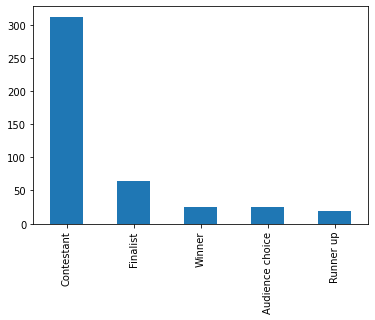

In [180]:
#4. Statistical analysis:
#Check frequency distribution of Result variable.
print(Part3_df['Result'].value_counts())
fig, ax = plt.subplots()
Part3_df['Result'].value_counts().plot(ax=ax, kind='bar')

##### More companies contested, which is obvious. 

In [181]:
#4. Statistical analysis:
#Calculate percentage of winners that are still operating and percentage of contestants that are still operating
Operating = Part3_df[Part3_df['OperatingState'] == 'Operating']
print("Results that are still operating\n",Operating['Result'].value_counts())
Win_Op = (((Operating[Operating['Result'] == 'Winner'])['Result'].count()/Operating['Result'].count())*100).round(decimals=2)
Cont_Op = (((Operating[Operating['Result'] == 'Contestant'])['Result'].count()/Operating['Result'].count())*100).round(decimals=2)
print("\n\n\npercentage of winners that are still operating %.2f%%"% Win_Op)
print("percentage of winners that are still operating %.2f%%"% Cont_Op)

Results that are still operating
 Contestant         214
Finalist            46
Audience choice     23
Winner              18
Runner up           18
Name: Result, dtype: int64



percentage of winners that are still operating 5.64%
percentage of winners that are still operating 67.08%


In [182]:
#4. Statistical analysis:
#Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
Total_Win = (Part3_df[Part3_df['Result'] == 'Winner']['Result'].count())
Total_Cont = (Part3_df[Part3_df['Result'] == 'Contestant']['Result'].count())

##### H0: There is no signficant change in proprtion of  Total Winner/Constants w.r.t Winners/Contestants that are operating. 
##### Ha: There is a signficant change in proprtion of  Total Winner/Constants w.r.t Winners/Contestants that are operating. 

Lets assume alpha = 0.05

In [183]:
stat, p_value = proportions_ztest([Win_Op,Cont_Op], [Total_Win,Total_Cont],  alternative='two-sided')
print(stat, p_value)
if p_value <0.05:
  print("\nwe reject H0 (defined above)")
else:
  print("\nwe accept H0 (or Fail to reject H0)")

0.12396783962680037 0.9013407388597632

we accept H0 (or Fail to reject H0)


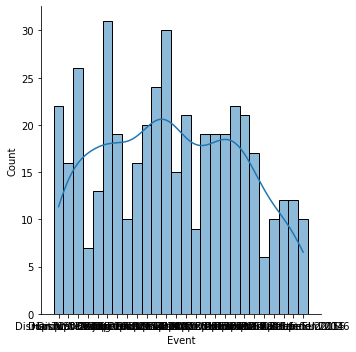

In [185]:
#4. Statistical analysis:
#Check distribution of the Event variable.
sns.displot(Part3_df['Event'],kde=True)

In [186]:
#4. Statistical analysis:
#Select only the Event that has disrupt keyword from 2013 onwards.
Temp = Part3_df[Part3_df['Event'].str.contains("Disrupt")]
Temp[Temp['Event'].str[-4:].astype(int) >= 2013]

,Startup,Product,Funding,Event,Result,OperatingState,FundinginMillions
1,3DLT,3dlt.com,630000,Disrupt NYC 2013,Contestant,Closed,0.630
3,3Dprintler,3dprintler.com,1000000,Disrupt NY 2016,Audience choice,Operating,1.000
13,Agrilyst,agrilyst.com,1000000,Disrupt SF 2015,Winner,Operating,1.000
14,Aiden,aiden.ai,750000,Disrupt London 2016,Contestant,Operating,0.750
16,Aircall,aircall.io,11600000,Disrupt SF 2015,Contestant,Operating,11.600
...,...,...,...,...,...,...,...
641,Workspot,workspot.com,15800000,Disrupt NYC 2013,Contestant,Operating,15.800
642,Xendo,xendo.com,28000,Disrupt SF 2014,Contestant,Acquired,0.028
646,YayPay Inc,yaypay.com,900000,Disrupt London 2015,Contestant,Operating,0.900
656,Zenefits,zenefits.com,583600000,Disrupt NYC 2013,Finalist,Operating,583.600


###  4. Statistical analysis:
#### Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards

In [188]:
temp = Part3_df.copy()
temp['Event'] = temp['Event'].astype('str')
Part3_df_2013onwards = Temp[Temp['Event'].str[-4:].astype(int) >= 2013]
Part3_df_EU_SF_NY = Part3_df_2013onwards[Part3_df_2013onwards['Event'].str.contains(' NY | EU | SF ')]
EU_SF_NY = Part3_df_EU_SF_NY[['Event', 'FundinginMillions']]
EU_SF_NY['Event'] = EU_SF_NY['Event'].str[-7:-4]
print(Part3_df_2013onwards[Part3_df_2013onwards['Event'].str.contains(' NY ')]['FundinginMillions'].sum())
print(Part3_df_2013onwards[Part3_df_2013onwards['Event'].str.contains(' EU ')]['FundinginMillions'].sum())
print(Part3_df_2013onwards[Part3_df_2013onwards['Event'].str.contains(' SF ')]['FundinginMillions'].sum())

95.711
67.6349
325.3568


<ipython-input-188-ffef8d2d38fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_SF_NY['Event'] = EU_SF_NY['Event'].str[-7:-4]


#### Question : Comparing the funds raised by companies across NY, SF and EU events from 2013 onwards
Lets assume alpha = 0.05
### H0: Funds raised in NY, SF, EU are all same. 
### Ha: Atleast one  of Funds raised in NY/SF/EU differes

In [190]:
mod = ols('FundinginMillions ~ Event', data = EU_SF_NY).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

if aov_table['PR(>F)']['Event'] <0.05:
  print("\nRejecting H0 ")
else:
  print("\n Failed to reject H0 ")

               sum_sq     df         F   PR(>F)
Event       67.395841    2.0  0.906534  0.40646
Residual  4832.394045  130.0       NaN      NaN

 Failed to reject H0 


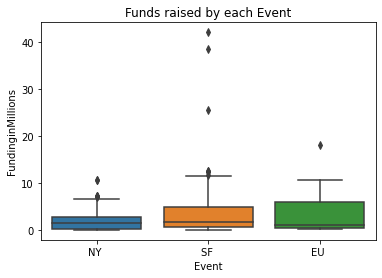

In [191]:
sns.boxplot(x = "Event", y = "FundinginMillions", data = EU_SF_NY)
plt.title('Funds raised by each Event')
plt.show()

##### SF events has more outliers
#### Funds raised of NY,EU seems to be different than SF events.

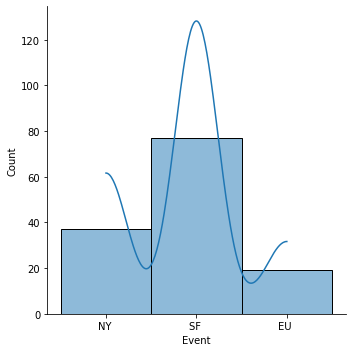

In [193]:
#4. Statistical analysis:
#Plot the distribution plot comparing the 3 city events
sns.displot(EU_SF_NY['Event'],kde = True)

##### SF Events are more in number than EU,NY

### 5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

1. The Part2 data set has good number of observations compared to Part-2 dataset. 
2. It has 220 rows has null values out of 662 rows, which is good number. So Quality is poor.
3. Events aren't clearly recorded as separate columns. Event consists name,place,year. Ny & NYC is confusing (I've omitted NYC where counting NY events)
4. This seems to be genarated by humans, which is hard to record all this. (mislead with incorrect numbers)
5. This takes more time to preprocess to analyze. 
6. Funds genarated by Events, mostly discrete. So such data may mislead sometimes.
7. Product should've been mentioned clearly rather than website address.
8. Event should've been split into 3 different columns - Name, City, Year.
9. More outliers interms of Funds, which is again influences the mean values.